In [1]:
import pandas as pd
import datetime 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib as joblib

In [2]:
model = joblib.load('model.pkl')

In [3]:
current_date = datetime.datetime.today().strftime('%Y-%m-%d-%H')
current_date

'2019-10-29-17'

In [4]:
date_str3 = '2019-01-05 05'
date_dt3 = datetime.datetime.strptime(date_str3, '%Y-%m-%d %H')

remaining_hour = date_dt3.hour
remaining_hour = 24 - remaining_hour - 1

af2_date = date_dt3 + datetime.timedelta(hours=remaining_hour, minutes=0, seconds=0)
af2_date = af2_date.strftime('%Y-%m-%d-%H')
days = pd.date_range(start=date_str3, end=af2_date, freq='H')

In [5]:
# remaining_hour = datetime.datetime.today().hour
# remaining_hour = 24 - remaining_hour - 1

# af2_date = datetime.datetime.today() + datetime.timedelta(hours=remaining_hour, minutes=0, seconds=0)
# af2_date = af2_date.strftime('%Y-%m-%d-%H')
# days = pd.date_range(start=current_date, end=af2_date, freq='H')

In [6]:
df_af1 = pd.DataFrame({'Uhrzeit': days})

df_af1['hour'] = df_af1['Uhrzeit'].dt.hour.values
df_af1['weekday'] = df_af1['Uhrzeit'].dt.dayofweek.values
input_df = df_af1.copy()
del input_df['Uhrzeit']
input_df

,hour,weekday
0,5,5
1,6,5
2,7,5
3,8,5
4,9,5
5,10,5
6,11,5
7,12,5
8,13,5
9,14,5


In [7]:
y_load_predit = model.predict(input_df)

In [8]:
d = {'Uhrzeit': df_af1['Uhrzeit'], 'Anzahl': y_load_predit, 'Strasse': 'Neusser Str.'}
result = pd.DataFrame(data=d)

In [9]:
result = result.sort_values(by=['Uhrzeit'])
result['Anzahl'] = result['Anzahl'].apply(np.ceil)

In [10]:
result

,Uhrzeit,Anzahl,Strasse
0,2019-01-05 05:00:00,0.0,Neusser Str.
1,2019-01-05 06:00:00,0.0,Neusser Str.
2,2019-01-05 07:00:00,1.0,Neusser Str.
3,2019-01-05 08:00:00,0.0,Neusser Str.
4,2019-01-05 09:00:00,1.0,Neusser Str.
5,2019-01-05 10:00:00,4.0,Neusser Str.
6,2019-01-05 11:00:00,23.0,Neusser Str.
7,2019-01-05 12:00:00,9.0,Neusser Str.
8,2019-01-05 13:00:00,7.0,Neusser Str.
9,2019-01-05 14:00:00,1.0,Neusser Str.


In [11]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 3 columns):
Uhrzeit    19 non-null datetime64[ns]
Anzahl     19 non-null float64
Strasse    19 non-null object
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 608.0+ bytes


In [12]:
result['Uhrzeit'] = result['Uhrzeit'].dt.strftime('%H:%M')
result.set_index('Uhrzeit', inplace=True)

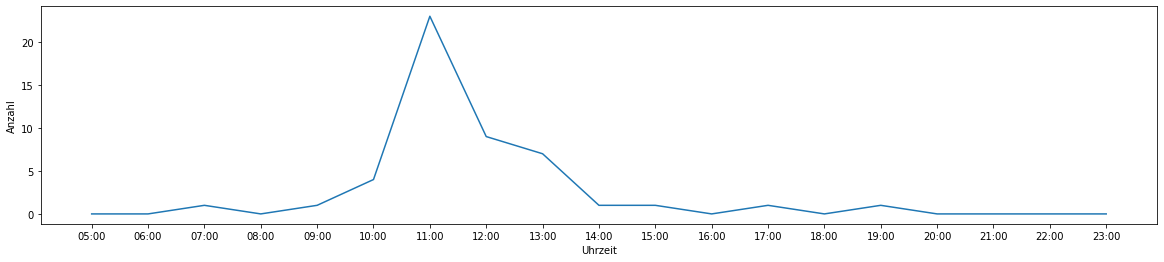

In [14]:
a4_dims = (20, 4)
fig, ax = plt.subplots( figsize=a4_dims)
ax = sns.lineplot(x=result.index, y="Anzahl", data=result)